In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('UV_noise.csv', header = None)
df

,0,1
0,200.0,0.128823
1,200.2,0.117582
2,200.4,0.125130
3,200.6,0.121738
4,200.8,0.104534
...,...,...
1096,419.2,0.022818
1097,419.4,0.025858
1098,419.6,0.029388
1099,419.8,0.021187


In [3]:
wl = df[0]
Abs = df[1]

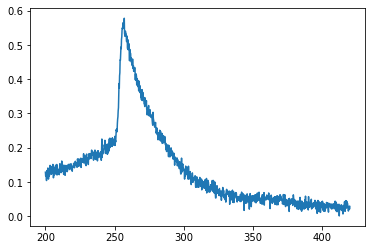

In [4]:
import matplotlib.pyplot as plt

plt.plot(wl, Abs)
plt.show()

In [6]:
import numpy as np

valid,same,full

In [7]:
Abs_smooth = np.convolve(Abs, np.ones(9)/9, mode = 'same')

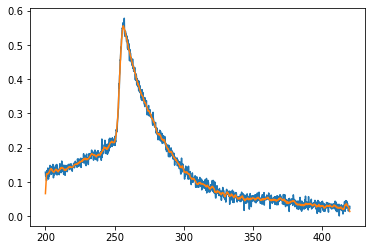

In [9]:
plt.plot(wl, Abs)
plt.plot(wl, Abs_smooth)
plt.show()

In [10]:
df[2] = Abs_smooth
df

,0,1,2
0,200.0,0.128823,0.066423
1,200.2,0.117582,0.081271
2,200.4,0.125130,0.095023
3,200.6,0.121738,0.107462
4,200.8,0.104534,0.121957
...,...,...,...
1096,419.2,0.022818,0.026397
1097,419.4,0.025858,0.022209
1098,419.6,0.029388,0.019199
1099,419.8,0.021187,0.015976


In [11]:
df.to_csv('UV_filter.csv', header = None, index = None)

In [12]:
from scipy.signal import savgol_filter

Abs_sg = savgol_filter(Abs, 9, 2)

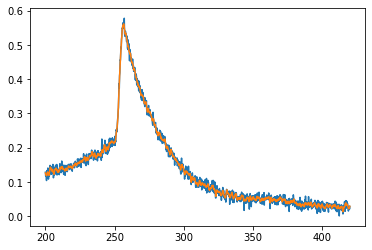

In [13]:
plt.plot(wl, Abs)
plt.plot(wl, Abs_sg)
plt.show()

In [14]:
def find_peak(wl, a):
    peak = []
    for i in range(len(a)):
        if(i < 100):
            if(a[i] == np.max(a[:i+100])):
                peak.append(wl[i])
        elif(i > len(a) - 100):
            if(a[i] == np.max(a[i-100:])):
                peak.append(wl[i])
        else:
            if(a[i] == np.max(a[i-100:i+100])):
                peak.append(wl[i])
    return peak

In [16]:
find_peak(wl, Abs)

[257.0, 417.2]